# Cu-B

TODO:

 - Clean up time-resolved R(q) plots
 - Refit 60 Hz data and time-resolved data using constraint fit as starting point
 - FIX imaginary SLD of platted layer to zero?

In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [3]:
project_dir = os.path.expanduser('~/git/nh3-analysis/jan2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6')

#dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
dyn_model_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')

results_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting', 'results'))


# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-29196/shared/autoreduce/'

# Directory with fit results
fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')

## Summary of 60 Hz data

Z offset = -93.7009;    Z_max = 769.7
Too many points: pruning down
MC file read: 0.0029571056365966797 sec
Done 0.4084641933441162 sec
Z offset = -220.61;    Z_max = 1184
Too many points: pruning down
MC file read: 0.00770258903503418 sec
Done 1.4161484241485596 sec
Z offset = -224.598;    Z_max = 1200.5
Too many points: pruning down
MC file read: 0.006156206130981445 sec
Done 1.3238985538482666 sec
Z offset = -256.32;    Z_max = 1245.3
Too many points: pruning down
MC file read: 0.00813436508178711 sec
Done 1.4429607391357422 sec
Z offset = -208.727;    Z_max = 1194.3
Too many points: pruning down
MC file read: 0.0060291290283203125 sec
Done 1.1732666492462158 sec


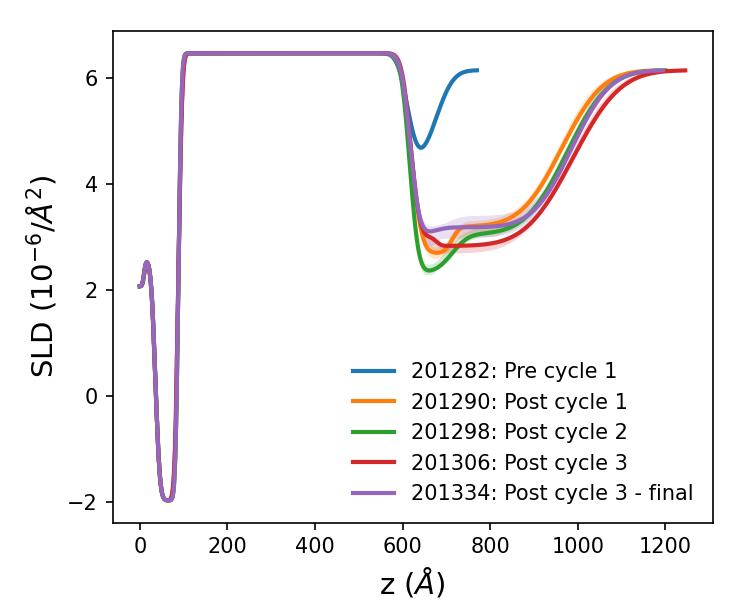

In [18]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(201282, "201282: Pre cycle 1", fit_dir=fit_dir)
summary_plots.plot_sld(201290, "201290: Post cycle 1", fit_dir=fit_dir)
summary_plots.plot_sld(201298, "201298: Post cycle 2", fit_dir=fit_dir)
summary_plots.plot_sld(201306, "201306: Post cycle 3", fit_dir=fit_dir)
summary_plots.plot_sld(201334, "201334: Post cycle 3 - final", fit_dir=fit_dir)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


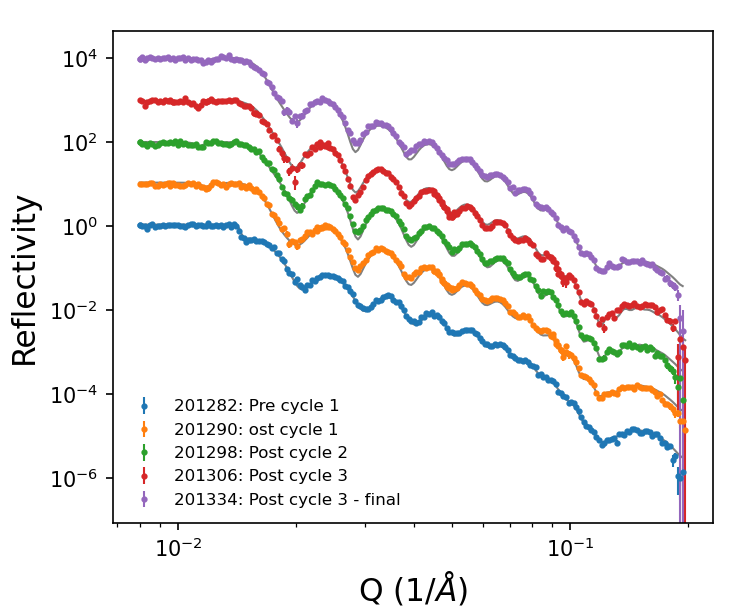

In [20]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(201282, '201282: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201290, '201290: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201298, '201298: Post cycle 2', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201306, '201306: Post cycle 3', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201334, '201334: Post cycle 3 - final', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


582


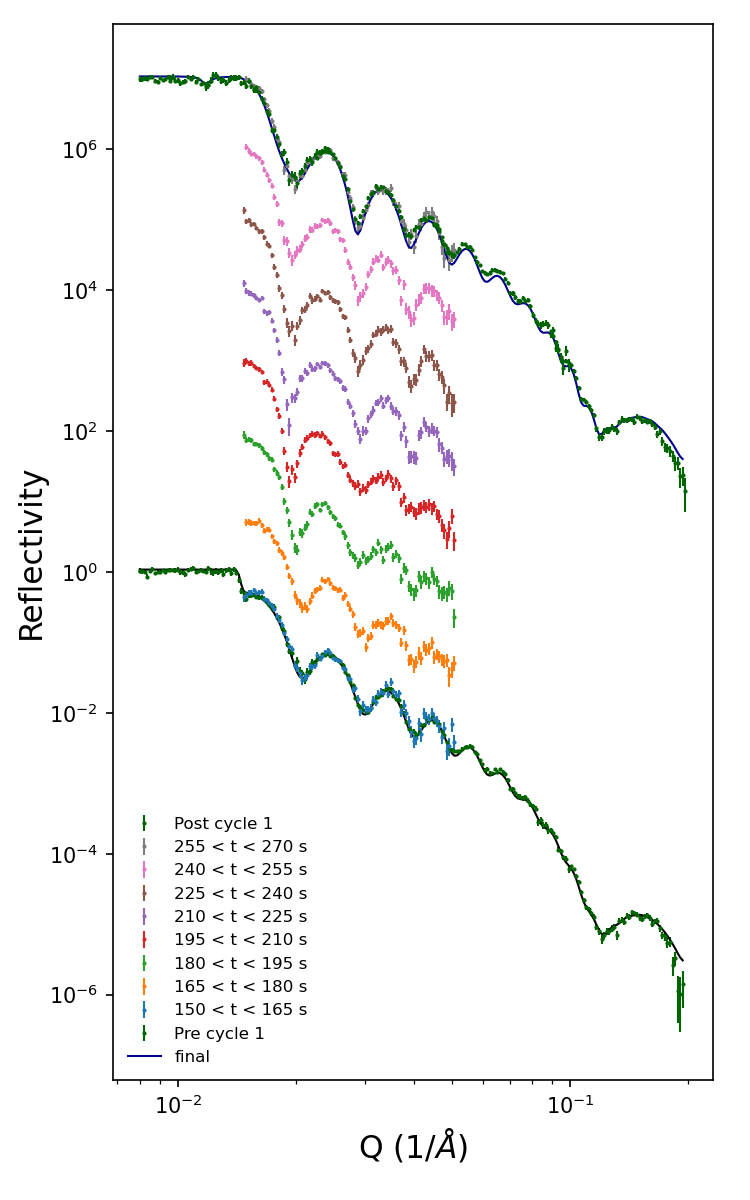

In [26]:
importlib.reload(summary_plots)

dynamic_run = 201289 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
dyn_fit_dir = os.path.expanduser('~/reflectivity_fits')
summary_plots.plot_dyn_data(dynamic_run, 201282, 201290, 
                            fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

Read in /SNS/users/m2d/reflectivity_fits/2215778/__model.py
/SNS/users/m2d/reflectivity_fits/2215778/__model
Z offset = -240.762;    Z_max = 1218.6
Too many points: pruning down
MC file read: 0.002894163131713867 sec
Done 6.874825716018677 sec
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201290/__model.py
Z offset = -215.58;    Z_max = 1175.7
Too many points: pruning down
MC file read: 0.004277706146240234 sec
Done 1.057291030883789 sec


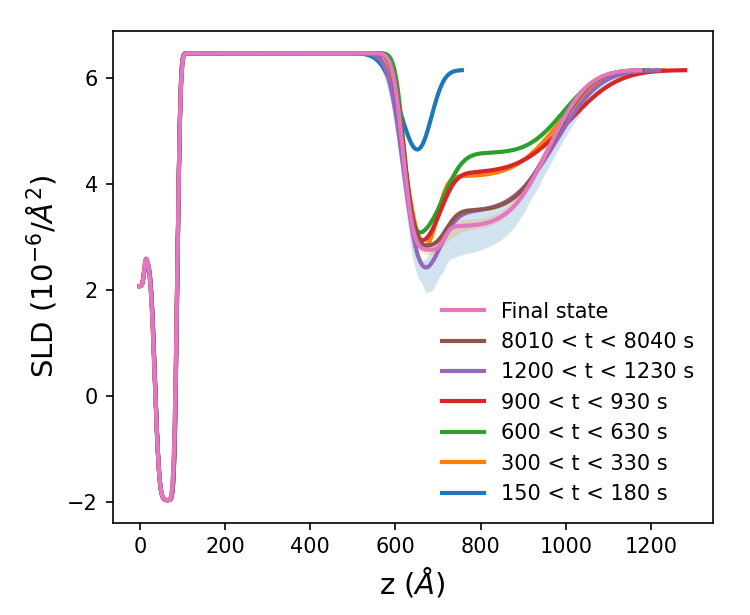

In [64]:
importlib.reload(summary_plots)

dynamic_run = 201289 # Cycle 1

# List of time-resolved data to plot
file_list = [[150, 'r201289_t000150', '2214805'],
             #[165, 'r201289_t000165', '2214802'],
             #[180, 'r201289_t000180', '2214801'],
             #[195, 'r201289_t000195', '2214800'],
             #[210, 'r201289_t000210', '2214803'],
             #[225, 'r201289_t000225', '2214804'],
             [300, 'r201289_t000300', '2215756'],
             [600, 'r201289_t000600', '2215758'],
             [900, 'r201289_t000900', '2215775'],
             [1200, 'r201289_t001200', '2215778'],
             [8010, 'r201289_t008010', '2215784'],
             
            ]

summary_plots.plot_dyn_sld(file_list, None, 201290, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Read in /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Model: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results/r201289_t000150/model-loop-v2
Z offset = -235.502;    Z_max = 1066
Too many points: pruning down
MC file read: 0.0014159679412841797 sec
Done 6.0263872146606445 sec
/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Read in /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Model: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results/r201289_t000165/model-loop-v2
Z offset = -235.567;    Z_max = 1066.1
Too many points: pruning down
MC file read: 0.0013744831085205078 sec
Done 6.148651838302612 sec
/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Read in /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201290-model.py
Model: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results/r201289_t000180/model-loop-v2
Z offs

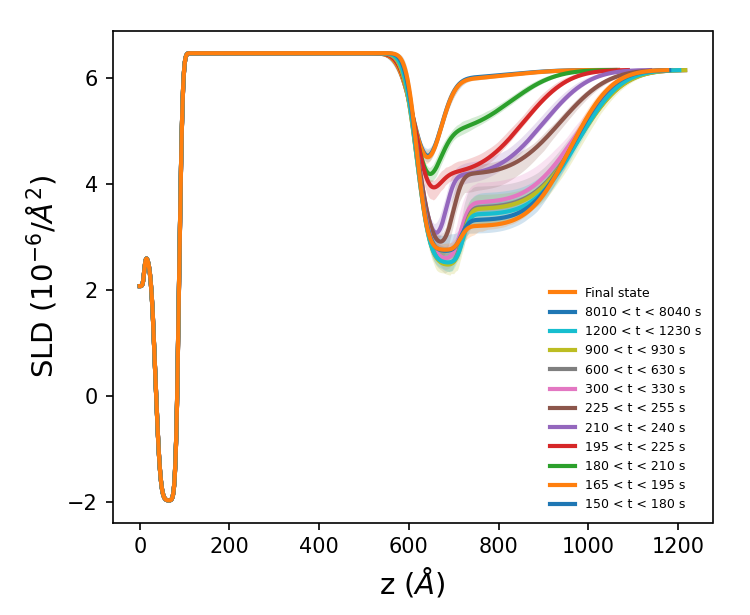

In [6]:
importlib.reload(summary_plots)

dynamic_run = 201289 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/15s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/results'
model_file = os.path.join(project_dir, 'dyn-fitting', '201290-model.py')

# List of time-resolved data to plot
file_list = [[150, 'r201289_t000150', 'r201289_t000150'],
             [165, 'r201289_t000165', 'r201289_t000165'],
             [180, 'r201289_t000180', 'r201289_t000180'],
             [195, 'r201289_t000195', 'r201289_t000195'],
             [210, 'r201289_t000210', 'r201289_t000210'],
             [225, 'r201289_t000225', 'r201289_t000225'],
             [300, 'r201289_t000300', 'r201289_t000300'],
             [600, 'r201289_t000600', 'r201289_t000600'],
             [900, 'r201289_t000900', 'r201289_t000900'],
             [1200, 'r201289_t001200', 'r201289_t001200'],
             [8010, 'r201289_t008010', 'r201289_t008010'],
             
            ]

# os.path.join(project_dir, 'model-loop-v2.py')
summary_plots.plot_dyn_sld(file_list, None, 201290, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                           model_name='model-loop-v2', model_file=model_file)

## Trend data

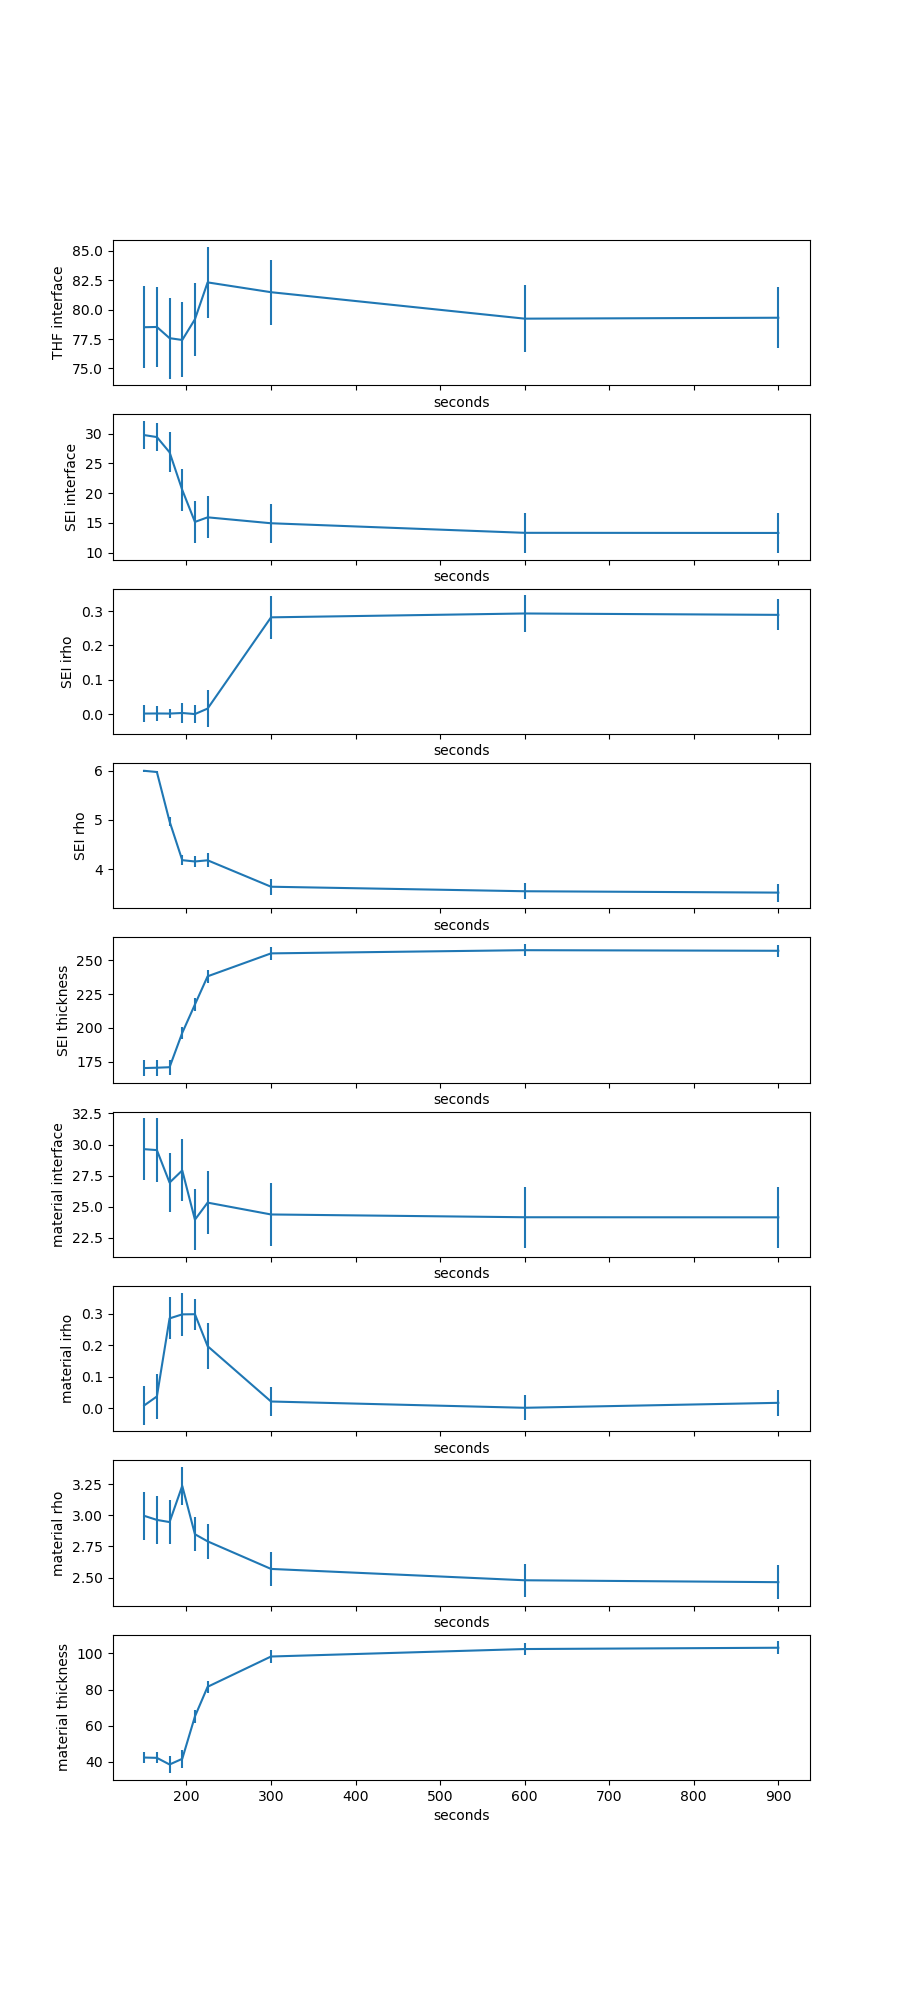

In [21]:
importlib.reload(summary_plots)

summary_plots.trend_data(file_list[:-2], None, 201290, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-v2', model_file=model_file)